In [ ]:
all_es_prop = []

for i, (n, lnk) in enumerate(all_es[:10]):
    es = BeautifulSoup(urllib.request.urlopen(lnk), 'lxml')
    es_pr = {}

    all_cities_in_group = []
    mw_pages = es.find("div", {"id": "mw-pages"})
    group_cities_links = []
    saved_th = []
    cities_rows = []

    df_parsed = pd.DataFrame()

    if mw_pages is not None:
        group_cities = mw_pages.find("a")
        all_cities_in_group.append(group_cities["title"])
        group_cities_links.append(f"https://ru.wikipedia.org{group_cities['href']}")

    for link in group_cities_links:
        cs = BeautifulSoup(urllib.request.urlopen(link), 'lxml')
        cities_table = cs.find("table", class_="standard")
        if cities_table is not None:
            for row in cities_table.find_all("tr"):
                th = row.find_all("th")
                #print(th.text)
                if th:
                    #pass
                    print(f"Th length: {len(th)}")
                    for i in range(len(th)):

                        print(th[i].text.strip(), end=' || ')
                        saved_th.append(th[i].text.strip())
                        #df_parsed[th[i].text.strip()] = 0
                td = row.find_all('td')
                #print(td.text)
                if td:
                    for i in range(len(td)):
                        a_img = td[i].find_all("a", class_="image")

                        if a_img:
                            for each_img in a_img:
                                img_src = each_img.find_all("img")
                                if img_src:
                                    for each_src in img_src:

                                        image_link = each_src["src"]
                                        # print(f"Th[i]: {i}")
                                        # print(f"Th now: {saved_th}")
                                        # print(f"Th length now: {len(saved_th)}")
                                        # print(f"Image link in: {saved_th[i]}")


                        es_pr[td[i].text.strip() if saved_th[i] == "№" else len(es_pr)] = {saved_th[i]: td[i].text.strip()}

                        df_parsed[saved_th[i]] = td[i].text.strip()
                        print(td[i].text.strip(), "----", saved_th[i])


    #print(es_pr)
    all_es_prop.append((n, {"Города": es_pr}))
    #print('{}: {}, Название города: {}'.format(i, n, city_name))


In [95]:
import urllib
import urllib.parse
import urllib.request
import requests

from bs4 import BeautifulSoup

from selenium import webdriver

In [128]:
url_vedomosti = "https://api.vedomosti.ru/v2/lists/rubrics-business-top?offset=73&limit=20"
#url_es = 'https://ru.wikipedia.org/wiki/Категория:Электростанции_по_алфавиту'
url_es_q  = urllib.parse.quote(url_vedomosti, safe='/:')
print(url_es_q)

https://api.vedomosti.ru/v2/lists/rubrics-business-top%3Foffset%3D73%26limit%3D20


In [166]:


es_bs = BeautifulSoup(requests.get("https://api.vedomosti.ru/v2/lists/rubrics-business-top", data={"offset": 73, "limit": 11}, headers={"Content-Type": "application/json", "x-access-token": "213123"}).content, 'lxml')

es_bs.find_all("a", class_="article-preview-item")



[]

In [143]:
import requests
import traceback

def searchApi():
    endpoint = "https://api.vedomosti.ru/v2/lists/rubrics-business-top?offset=73&limit=20"
    try:
        response = requests.post(endpoint)
        if(response.status_code == 200):
            for msg in response:
                print(msg)
    except Exception:
        print(traceback.format_exc())

searchApi()

In [171]:
content = requests.get("https://api.vedomosti.ru/v2/lists/rubrics-business-top", data={"offset": 73, "limit": 11}, headers={"Content-Type": "application/json", "x-access-token": "213123"}).content

In [172]:
import pandas as pd

In [175]:
content

b'{"list":{"id":140737488355330,"slug":"rubrics-business-top","description":null,"documents":[{"apologize":false,"archived":false,"box_move_at":null,"box_move_editor_id":0,"categories":{"kinds":{"path":"kinds.materials","slug":"materials","title":"\xd0\x9c\xd0\xb0\xd1\x82\xd0\xb5\xd1\x80\xd0\xb8\xd0\xb0\xd0\xbb\xd1\x8b","position":0,"subscribable":false},"parts":{"path":"parts.articles","slug":"articles","title":"\xd0\xa1\xd1\x82\xd0\xb0\xd1\x82\xd1\x8c\xd1\x8f","position":10,"subscribable":false},"domains":{"path":"domains.vedomosti_ru","slug":"vedomosti.ru","title":"vedomosti.ru","position":0,"subscribable":false},"project":{"path":"project.vedomosti","slug":"vedomosti","title":"\xd0\x92\xd0\xb5\xd0\xb4\xd0\xbe\xd0\xbc\xd0\xbe\xd1\x81\xd1\x82\xd0\xb8","position":10,"subscribable":false},"rubrics":[{"path":"rubrics.economics","slug":"economics","title":"\xd0\xad\xd0\xba\xd0\xbe\xd0\xbd\xd0\xbe\xd0\xbc\xd0\xb8\xd0\xba\xd0\xb0","position":10,"subrubrics":{"path":"rubrics.economics.subru

In [110]:






# for links in es_bs.find_all("div", class_="grid-cell__body"):
#     for l in links.find_all("a"):
#         print(l["href"])
es_bs.find_all("a", class_="article-preview-item")

[]

In [28]:
all_es = []

for i in range(30):
    # load links:
    bef = len(all_es)
    for links in es_bs.find_all('div', class_='card-newsline'):
        print(links)
        for l in links.find_all('a'):
            all_es.append((l['title'], url_vedomosti+l['href']))

<div class="card-newsline articles-cards-list__card cols-2 rows-1 --newsline"><div class="section-name"><h1 class="section-name__title">Также в рубрике</h1> </div> <!-- --></div>
<div class="card-newsline articles-cards-list__card cols-2 rows-1 --newsline"><div class="section-name"><h1 class="section-name__title">Также в рубрике</h1> </div> <!-- --></div>
<div class="card-newsline articles-cards-list__card cols-2 rows-1 --newsline"><div class="section-name"><h1 class="section-name__title">Также в рубрике</h1> </div> <!-- --></div>
<div class="card-newsline articles-cards-list__card cols-2 rows-1 --newsline"><div class="section-name"><h1 class="section-name__title">Также в рубрике</h1> </div> <!-- --></div>
<div class="card-newsline articles-cards-list__card cols-2 rows-1 --newsline"><div class="section-name"><h1 class="section-name__title">Также в рубрике</h1> </div> <!-- --></div>
<div class="card-newsline articles-cards-list__card cols-2 rows-1 --newsline"><div class="section-name"><

In [25]:
all_es

[]

In [ ]:
all_es_prop = []

In [ ]:
for i, (n, lnk) in enumerate(all_es[:10]):
    es = BeautifulSoup(urllib.request.urlopen(lnk), 'lxml')
    coord = es.find_all('a', class_='mw-kartographer-maplink')
    if len(coord) > 0:
        lat, lon = coord[0]['data-lat'], coord[0]['data-lon']
    else:
        print('{}: {}, COORDINATES IS NOT FOUND! link: {}'.format(i, n, lnk))
        continue

    es_pr = {}
    table = es.find('table', class_="infobox")
    if table is not None:
        for row in table.find_all('tr'):
            th = row.find_all('th')
            if th and len(th):
    #             print(th[0].text.strip(), end=' || ')
                td = row.find_all('td')
                if td and len(td):
                    es_pr[th[0].text.strip()] = td[0].text.strip()
        #             print(td[0].text.strip())
        all_es_prop.append((n, lnk, lat, lon, es_pr))
        print('{}: {}, lat: {}, lon: {}, cont: {}'.format(i, n, lat, lon, es_pr.get('Страна', '--')))
    else:
        print('{}: {}, TABLE IS NOT FOUND! link: {}'.format(i, n, lnk))

In [ ]:
all_es_prop

In [176]:
news_dataframe = pd.read_csv("abcnews-date-text.csv")

In [177]:
news_dataframe

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1244179,20211231,two aged care residents die as state records 2...
1244180,20211231,victoria records 5;919 new cases and seven deaths
1244181,20211231,wa delays adopting new close contact definition
1244182,20211231,western ringtail possums found badly dehydrate...


In [178]:
news_dataframe.dtypes

publish_date      int64
headline_text    object
dtype: object

In [179]:
news_dataframe["publish_date"] = pd.to_datetime(news_dataframe["publish_date"].astype(str), format="%Y%m%d")

news_dataframe

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers
...,...,...
1244179,2021-12-31,two aged care residents die as state records 2...
1244180,2021-12-31,victoria records 5;919 new cases and seven deaths
1244181,2021-12-31,wa delays adopting new close contact definition
1244182,2021-12-31,western ringtail possums found badly dehydrate...


In [180]:
news_dataframe.dtypes

publish_date     datetime64[ns]
headline_text            object
dtype: object

In [185]:
news_dataframe.value_counts()

publish_date  headline_text                                              
2021-03-01    house prices record sharpest increase since 2003               2
2021-06-01    house prices reach record levels; as investors                 2
2003-02-19    a g calls for infrastructure protection summit                 1
2013-10-28    6yo girl dies after car hits roo                               1
              asbestos removed from jezzine barracks site                    1
                                                                            ..
2008-10-03    court hears murder accused was to inherit estate               1
              couple killed with helmets brooms in ritual cure               1
              country hour highlights                                        1
              council plans 100m worker village                              1
2021-12-31    what makes you a close covid contact here are the new rules    1
Length: 1244182, dtype: int64

In [188]:
news_dataframe["headline_text"][:10000].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)

aba               3.0
decides           3.0
against         134.0
community        54.0
broadcasting      1.0
                ...  
discard           1.0
palaces           1.0
units             1.0
vasco             1.0
edmundos          1.0
Length: 10058, dtype: float64

In [199]:
news_dataframe["headline_text"].apply(lambda x: len(x.split())).mean()

6.557522842280563

In [200]:
import nltk

In [202]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/noble6/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [203]:
from nltk.corpus import stopwords
stopwords.words("russian")

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [208]:
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package wordnet to /home/noble6/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/noble6/nltk_data...


True

In [219]:
lemmatize = nltk.WordNetLemmatizer()

lemmatize.lemmatize("gangs")

'gang'

In [471]:
tinkoff_df = pd.read_csv("forbes_data_tf.csv")

tinkoff_df

,Article,Body,Date
0,как ит компании получить аккредитацию по новым...,1 октября 2 22 года вступил в силу новый поряд...,07.10.22
1,яндекс маркет разрешил торговать подержанными ...,яндекс маркет откроет доступ к разделу ресейл ...,06.10.22
2,азиатские рынки дружественная среда основатель...,пять лет назад алиса пейрис начала производить...,06.10.22
3,это бизнес а не нко как сделать инклюзивное ка...,в конце 2 19 года мы вместе с командой инклюзи...,05.10.22
4,что делать если призовут на службу а бизнес ос...,я индивидуальный предприниматель по всем парам...,05.10.22
...,...,...,...
776,бизнес организация концертов,в 16 лет стас смольянинов из воронежа занял у ...,26.06.19
777,вычет за онлайн кассу как получить до 1 июля п...,1 июля у некоторых ип закончится отсрочка по о...,26.06.19
778,бизнес как я потеряла миллион рублей на выстав...,я хотела заработать миллион рублей а в результ...,19.06.19
779,зачем нужен уставный капитал в ооо,уставный капитал ооо это условная сумма выраже...,18.06.19


In [246]:
tinkoff_df["Body"].apply(lambda x: x.split(" "))

0      [1, октября, 2, 22, года, вступил, в, силу, но...
1      [яндекс, маркет, откроет, доступ, к, разделу, ...
2      [пять, лет, назад, алиса, пейрис, начала, прои...
3      [в, конце, 2, 19, года, мы, вместе, с, командо...
4      [я, индивидуальный, предприниматель, по, всем,...
                             ...                        
776    [в, 16, лет, стас, смольянинов, из, воронежа, ...
777    [1, июля, у, некоторых, ип, закончится, отсроч...
778    [я, хотела, заработать, миллион, рублей, а, в,...
779    [уставный, капитал, ооо, это, условная, сумма,...
780    [в, предыдущих, сериях, мы, выбирали, название...
Name: Body, Length: 780, dtype: object

In [247]:
tinkoff_df["Body"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)

в                 53387.0
ит                  235.0
и                 48775.0
на                31974.0
компании           2442.0
                   ...   
нарушенного           1.0
первоначальное        1.0
перспективах          1.0
последствиях          1.0
госреестра            1.0
Length: 80785, dtype: float64

In [472]:
tinkoff_df = tinkoff_df.dropna()


In [473]:
tinkoff_df[tinkoff_df["Body"].isna()]

,Article,Body,Date


In [377]:
tinkoff_df

,Article,Body,Date
0,как ит компании получить аккредитацию по новым...,1 октября 2 22 года вступил в силу новый поряд...,07.10.22
1,яндекс маркет разрешил торговать подержанными ...,яндекс маркет откроет доступ к разделу ресейл ...,06.10.22
2,азиатские рынки дружественная среда основатель...,пять лет назад алиса пейрис начала производить...,06.10.22
3,это бизнес а не нко как сделать инклюзивное ка...,в конце 2 19 года мы вместе с командой инклюзи...,05.10.22
4,что делать если призовут на службу а бизнес ос...,я индивидуальный предприниматель по всем парам...,05.10.22
...,...,...,...
776,бизнес организация концертов,в 16 лет стас смольянинов из воронежа занял у ...,26.06.19
777,вычет за онлайн кассу как получить до 1 июля п...,1 июля у некоторых ип закончится отсрочка по о...,26.06.19
778,бизнес как я потеряла миллион рублей на выстав...,я хотела заработать миллион рублей а в результ...,19.06.19
779,зачем нужен уставный капитал в ооо,уставный капитал ооо это условная сумма выраже...,18.06.19


In [239]:
!pip install pymorphy2

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 755.3 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 26.2 MB/s eta 0:00:0000:0100:01
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=58d0c94bb0cca283bf291749c2d1115bc64f7020111770aeffb77414c6f3cac3
  Stored in directory: /home/noble6/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [283]:
import time
import pymorphy2
time_start = time.time()
for i in range(100000):
    x = pymorphy2.MorphAnalyzer().parse("бизнесы")[0].normal_form

total_time = time.time() - time_start

total_time

KeyboardInterrupt: 

In [258]:
stopwords.words("russian")

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [266]:
tinkoff_df["Body"] = tinkoff_df["Body"].apply(lambda x: x.split(" "))

/tmp/ipykernel_876618/2283845642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tinkoff_df["Body"] = tinkoff_df["Body"].apply(lambda x: x.split(" "))


In [ ]:
# [x if x not in stopwords.words("russian") else ""]]

In [282]:
tinkoff_df["Body"].apply(lambda x: [j if j not in stopwords.words("russian") else "" for j in x])


0      [1, октября, 2, 22, года, вступил, , силу, нов...
1      [яндекс, маркет, откроет, доступ, , разделу, р...
2      [пять, лет, назад, алиса, пейрис, начала, прои...
3      [, конце, 2, 19, года, , вместе, , командой, и...
4      [, индивидуальный, предприниматель, , всем, па...
                             ...                        
776    [, 16, лет, стас, смольянинов, , воронежа, зан...
777    [1, июля, , некоторых, ип, закончится, отсрочк...
778    [, хотела, заработать, миллион, рублей, , , ре...
779    [уставный, капитал, ооо, это, условная, сумма,...
780    [, предыдущих, сериях, , выбирали, название, ,...
Name: Body, Length: 780, dtype: object

In [280]:
tinkoff_df["Body"] = tinkoff_df[""]

KeyError: ''

In [264]:
tinkoff_df["Body"].str.replace("октября", lambda x: x if x else "")

0                                                    NaN
1                                                    NaN
2      пять лет назад алиса пейрис начала производить...
3      в конце 2 19 года мы вместе с командой инклюзи...
4      я индивидуальный предприниматель по всем парам...
                             ...                        
776    в 16 лет стас смольянинов из воронежа занял у ...
777    1 июля у некоторых ип закончится отсрочка по о...
778    я хотела заработать миллион рублей а в результ...
779    уставный капитал ооо это условная сумма выраже...
780    в предыдущих сериях мы выбирали название для б...
Name: Body, Length: 780, dtype: object

In [294]:
import numpy as np
array_words = []

our_words = np.array(tinkoff_df["Article"].apply(lambda x: array_words.append(x.split())))

array_words

[['как',
  'ит',
  'компании',
  'получить',
  'аккредитацию',
  'по',
  'новым',
  'правилам'],
 ['яндекс',
  'маркет',
  'разрешил',
  'торговать',
  'подержанными',
  'товарами',
  'всем',
  'продавцам'],
 ['азиатские',
  'рынки',
  'дружественная',
  'среда',
  'основательница',
  'холи',
  'корн',
  'алиса',
  'пейрис',
  'об',
  'экспорте'],
 ['это',
  'бизнес',
  'а',
  'не',
  'нко',
  'как',
  'сделать',
  'инклюзивное',
  'кафе',
  'успешным'],
 ['что',
  'делать',
  'если',
  'призовут',
  'на',
  'службу',
  'а',
  'бизнес',
  'оставить',
  'не',
  'на',
  'кого'],
 ['я',
  'открыл',
  'ит',
  'школу',
  'по',
  'франшизе',
  'и',
  'зарабатываю',
  '45',
  'в',
  'месяц'],
 ['что', 'делать', 'работодателю', 'если', 'сотрудника', 'мобилизовали'],
 ['как', 'ип', 'на', 'усн', 'получить', 'статус', 'малоимущей', 'семьи'],
 ['чем',
  'управляющая',
  'компания',
  'может',
  'помочь',
  'собственнику',
  'коммерческой',
  'недвижимости'],
 ['работодатели', 'и', 'мобилизация', '

In [293]:
tinkoff_df["Article"].str.split().apply(lambda x: pd.Series(x).map(x).values)

TypeError: 'list' object is not callable

In [284]:
from gensim.models import Word2Vec

In [308]:
word2vec = Word2Vec(array_words, min_count=3)

print(word2vec.wv.most_similar("создать", topn=10))

[('млн', 0.4479313790798187), ('3', 0.43627890944480896), ('предпринимателей', 0.43557509779930115), ('даже', 0.43555715680122375), ('время', 0.43065309524536133), ('открыла', 0.42940470576286316), ('2', 0.42630359530448914), ('новости', 0.42368757724761963), ('усн', 0.42236247658729553), ('могут', 0.4215225875377655)]


In [307]:
tinkoff_df[["Article", "Date"]]

,Article,Date
0,как ит компании получить аккредитацию по новым...,07.10.22
1,яндекс маркет разрешил торговать подержанными ...,06.10.22
2,азиатские рынки дружественная среда основатель...,06.10.22
3,это бизнес а не нко как сделать инклюзивное ка...,05.10.22
4,что делать если призовут на службу а бизнес ос...,05.10.22
...,...,...
776,бизнес организация концертов,26.06.19
777,вычет за онлайн кассу как получить до 1 июля п...,26.06.19
778,бизнес как я потеряла миллион рублей на выстав...,19.06.19
779,зачем нужен уставный капитал в ооо,18.06.19


In [ ]:
vector = model.wv['computer']  # get numpy vector of a word
sims = model.wv.most_similar('computer', topn=10)  # get other similar words

# Поиск трендов

In [476]:
# Убираем какашки

tinkoff_df["Date"] = pd.to_datetime(tinkoff_df["Date"].astype(str), format="%d.%m.%y")

/tmp/ipykernel_876618/2247045151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tinkoff_df["Date"] = pd.to_datetime(tinkoff_df["Date"].astype(str), format="%d.%m.%y")


In [480]:
tinkoff_df.sort_values("Date", ascending=False)

,Article,Body,Date
0,как ит компании получить аккредитацию по новым...,1 октября 2 22 года вступил в силу новый поряд...,2022-10-07
85,как ит компании получить аккредитацию по новым...,1 октября 2 22 года вступил в силу новый поряд...,2022-10-07
1,яндекс маркет разрешил торговать подержанными ...,яндекс маркет откроет доступ к разделу ресейл ...,2022-10-06
2,азиатские рынки дружественная среда основатель...,пять лет назад алиса пейрис начала производить...,2022-10-06
117,как заключить договор с самозанятым,с самозанятыми работать проще и выгоднее чем с...,2022-10-05
...,...,...,...
776,бизнес организация концертов,в 16 лет стас смольянинов из воронежа занял у ...,2019-06-26
777,вычет за онлайн кассу как получить до 1 июля п...,1 июля у некоторых ип закончится отсрочка по о...,2019-06-26
778,бизнес как я потеряла миллион рублей на выстав...,я хотела заработать миллион рублей а в результ...,2019-06-19
779,зачем нужен уставный капитал в ооо,уставный капитал ооо это условная сумма выраже...,2019-06-18


In [495]:
# !!!!!!!!!

groups = tinkoff_df.groupby("Date", as_index=False)["Article"]

df_to_perform = groups.value_counts()[["Date", "Article"]]

df_to_perform

,Date,Article
0,2019-06-18,зачем нужен уставный капитал в ооо
1,2019-06-18,как защитить свой товарный знак
2,2019-06-19,бизнес как я потеряла миллион рублей на выстав...
3,2019-06-26,бизнес организация концертов
4,2019-06-26,вычет за онлайн кассу как получить до 1 июля п...
...,...,...
767,2022-10-05,что делать если призовут на службу а бизнес ос...
768,2022-10-05,это бизнес а не нко как сделать инклюзивное ка...
769,2022-10-06,азиатские рынки дружественная среда основатель...
770,2022-10-06,яндекс маркет разрешил торговать подержанными ...


In [496]:
df_to_perform["Article"] = df_to_perform["Article"].apply(lambda x: x.split())

df_to_perform

,Date,Article
0,2019-06-18,"[зачем, нужен, уставный, капитал, в, ооо]"
1,2019-06-18,"[как, защитить, свой, товарный, знак]"
2,2019-06-19,"[бизнес, как, я, потеряла, миллион, рублей, на..."
3,2019-06-26,"[бизнес, организация, концертов]"
4,2019-06-26,"[вычет, за, онлайн, кассу, как, получить, до, ..."
...,...,...
767,2022-10-05,"[что, делать, если, призовут, на, службу, а, б..."
768,2022-10-05,"[это, бизнес, а, не, нко, как, сделать, инклюз..."
769,2022-10-06,"[азиатские, рынки, дружественная, среда, основ..."
770,2022-10-06,"[яндекс, маркет, разрешил, торговать, подержан..."


In [497]:
# Удалить стоп слова
df_to_perform["Article"] = df_to_perform["Article"].apply(lambda x: [j if j not in stopwords.words("russian") else "" for j in x])

df_to_perform

,Date,Article
0,2019-06-18,"[, нужен, уставный, капитал, , ооо]"
1,2019-06-18,"[, защитить, свой, товарный, знак]"
2,2019-06-19,"[бизнес, , , потеряла, миллион, рублей, , выст..."
3,2019-06-26,"[бизнес, организация, концертов]"
4,2019-06-26,"[вычет, , онлайн, кассу, , получить, , 1, июля..."
...,...,...
767,2022-10-05,"[, делать, , призовут, , службу, , бизнес, ост..."
768,2022-10-05,"[это, бизнес, , , нко, , сделать, инклюзивное,..."
769,2022-10-06,"[азиатские, рынки, дружественная, среда, основ..."
770,2022-10-06,"[яндекс, маркет, разрешил, торговать, подержан..."


In [498]:
df_to_perform

,Date,Article
0,2019-06-18,"[, нужен, уставный, капитал, , ооо]"
1,2019-06-18,"[, защитить, свой, товарный, знак]"
2,2019-06-19,"[бизнес, , , потеряла, миллион, рублей, , выст..."
3,2019-06-26,"[бизнес, организация, концертов]"
4,2019-06-26,"[вычет, , онлайн, кассу, , получить, , 1, июля..."
...,...,...
767,2022-10-05,"[, делать, , призовут, , службу, , бизнес, ост..."
768,2022-10-05,"[это, бизнес, , , нко, , сделать, инклюзивное,..."
769,2022-10-06,"[азиатские, рынки, дружественная, среда, основ..."
770,2022-10-06,"[яндекс, маркет, разрешил, торговать, подержан..."


In [493]:
morph = pymorphy2.MorphAnalyzer()

In [499]:
# Нормализуем слова

df_to_perform["Article"] = df_to_perform["Article"].apply(lambda x: [morph.parse(j)[0].normal_form for j in x])

df_to_perform

,Date,Article
0,2019-06-18,"[, нужный, уставный, капитал, , ооо]"
1,2019-06-18,"[, защитить, свой, товарный, знак]"
2,2019-06-19,"[бизнес, , , потерять, миллион, рубль, , выста..."
3,2019-06-26,"[бизнес, организация, концерт]"
4,2019-06-26,"[вычет, , онлайн, касса, , получить, , 1, июль..."
...,...,...
767,2022-10-05,"[, делать, , призвать, , служба, , бизнес, ост..."
768,2022-10-05,"[это, бизнес, , , нко, , сделать, инклюзивный,..."
769,2022-10-06,"[азиатский, рынок, дружественный, среда, основ..."
770,2022-10-06,"[яндекс, маркет, разрешить, торговать, подержа..."


In [514]:
# Считываем кол-во появлений по дате

from collections import Counter

df_to_perform["Article"] = df_to_perform["Article"].apply(Counter)

df_to_perform

,Date,Article
0,2019-06-18,"{'': 2, 'нужный': 1, 'уставный': 1, 'капитал':..."
1,2019-06-18,"{'': 1, 'защитить': 1, 'свой': 1, 'товарный': ..."
2,2019-06-19,"{'бизнес': 1, '': 3, 'потерять': 1, 'миллион':..."
3,2019-06-26,"{'бизнес': 1, 'организация': 1, 'концерт': 1}"
4,2019-06-26,"{'вычет': 1, '': 5, 'онлайн': 1, 'касса': 1, '..."
...,...,...
767,2022-10-05,"{'': 6, 'делать': 1, 'призвать': 1, 'служба': ..."
768,2022-10-05,"{'это': 1, 'бизнес': 1, '': 3, 'нко': 1, 'сдел..."
769,2022-10-06,"{'азиатский': 1, 'рынок': 1, 'дружественный': ..."
770,2022-10-06,"{'яндекс': 1, 'маркет': 1, 'разрешить': 1, 'то..."


In [574]:
# Построение графиков
df_to_visualise = pd.DataFrame()

df_to_visualise["Word"] = ["1"]
df_to_visualise["Count"] = ["1"]
df_to_visualise["Date"] = ["1"]

for i in range(len(df_to_perform)):
    for key, value in df_to_perform["Article"][i].items():
        #print(key, value)
        df_to_visualise.loc[i] = [key, value, df_to_perform["Date"][i]]
        # df_to_visualise.append({"Word": key, "Count": value, "Date": df_to_perform["Date"][i]}, ignore_index=True, sort=False)

df_to_visualise

,Word,Count,Date
0,ооо,1,2019-06-18 00:00:00
1,знак,1,2019-06-18 00:00:00
2,хендмейд,1,2019-06-19 00:00:00
3,концерт,1,2019-06-26 00:00:00
4,дать,1,2019-06-26 00:00:00
...,...,...,...
767,кто,1,2022-10-05 00:00:00
768,успешный,1,2022-10-05 00:00:00
769,экспорт,1,2022-10-06 00:00:00
770,продавец,1,2022-10-06 00:00:00


In [582]:
global_counts = df_to_visualise.groupby("Word").count()

global_counts

,Count,Date
Word,,
,1,1
1,2,2
12,1,1
15,1,1
19,2,2
...,...,...
экологичный,1,1
эксперт,2,2
экспорт,1,1


In [588]:
merged_df = pd.merge(df_to_visualise, global_counts, on="Word")

merged_df.sort_values("Count_y", ascending=False)

,Word,Count_x,Date_x,Count_y,Date_y
85,бизнес,1,2021-01-28 00:00:00,52,52
80,бизнес,1,2019-08-30 00:00:00,52,52
103,бизнес,1,2021-11-22 00:00:00,52,52
104,бизнес,1,2021-12-08 00:00:00,52,52
105,бизнес,1,2021-12-14 00:00:00,52,52
...,...,...,...,...,...
558,ресторан,1,2021-10-12 00:00:00,1,1
197,документ,1,2019-12-24 00:00:00,1,1
233,оао,1,2020-01-10 00:00:00,1,1
555,предпринимательница,1,2021-10-07 00:00:00,1,1


In [622]:
df_to_visualise["Date"] = pd.to_datetime(df_to_visualise["Date"].astype(str), format="%Y-%m-%d")

df_to_visualise

,Word,Count,Date
0,ооо,1,2019-06-18
1,знак,1,2019-06-18
2,хендмейд,1,2019-06-19
3,концерт,1,2019-06-26
4,дать,1,2019-06-26
...,...,...,...
767,кто,1,2022-10-05
768,успешный,1,2022-10-05
769,экспорт,1,2022-10-06
770,продавец,1,2022-10-06


In [656]:
group_counts_by_month = df_to_visualise.groupby([df_to_visualise["Date"].dt.year, df_to_visualise["Date"].dt.month, df_to_visualise["Word"]]).value_counts()

group_counts_by_month

Date  Date  Word         Count  Date      
2019  6     взнос        1      2019-06-27    1
            дать         1      2019-06-26    1
            знак         1      2019-06-18    1
            концерт      1      2019-06-26    1
            ооо          1      2019-06-18    1
                                             ..
2022  10    продавец     1      2022-10-06    1
            самозанятой  1      2022-10-05    1
            семья        1      2022-10-03    1
            успешный     1      2022-10-05    1
            экспорт      1      2022-10-06    1
Length: 770, dtype: int64

In [667]:
group_counts_by_month

Date  Date  Word         Count  Date      
2019  6     взнос        1      2019-06-27    1
            дать         1      2019-06-26    1
            знак         1      2019-06-18    1
            концерт      1      2019-06-26    1
            ооо          1      2019-06-18    1
                                             ..
2022  10    продавец     1      2022-10-06    1
            самозанятой  1      2022-10-05    1
            семья        1      2022-10-03    1
            успешный     1      2022-10-05    1
            экспорт      1      2022-10-06    1
Length: 770, dtype: int64

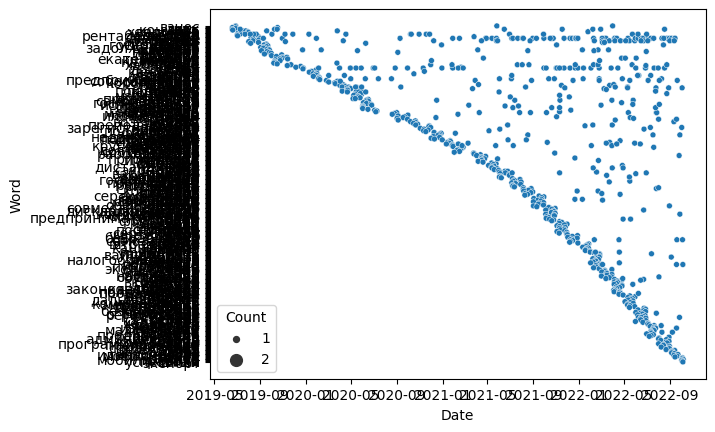

In [673]:
import seaborn as sns

#index = pd.date_range("1 5 2019", periods=20, freq="m", name="date")

plot = sns.scatterplot(data=group_counts_by_month, x="Date", y="Word", size="Count")

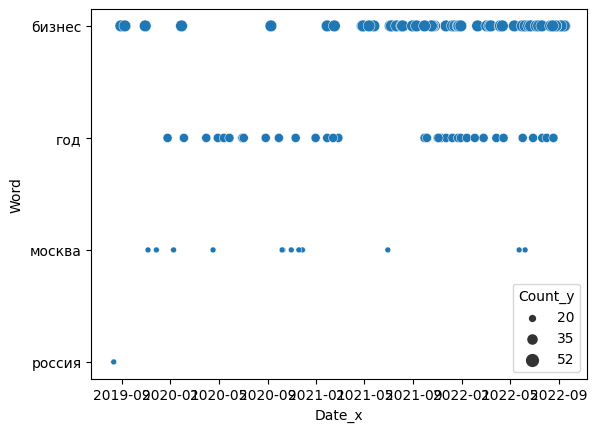

In [590]:


plot = sns.scatterplot(data=merged_df.sort_values("Count_y", ascending=False)[:100], x="Date_x", y="Word", size="Count_y")



In [505]:
# Считываем появления

df_to_perform["Article"].apply(lambda x: pd.value_counts(x))

,,нужный,уставный,капитал,ооо,защитить,свой,товарный,знак,бизнес,...,нко,азиатский,дружественный,среда,холя,корн,алиса,пейрис,подержать,аккредитация
0,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
768,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
769,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [508]:
df_to_perform["Date"]

0     2019-06-18
1     2019-06-18
2     2019-06-19
3     2019-06-26
4     2019-06-26
         ...    
767   2022-10-05
768   2022-10-05
769   2022-10-06
770   2022-10-06
771   2022-10-07
Name: Date, Length: 772, dtype: datetime64[ns]

In [450]:
tinkoff_df.groupby("Date", as_index=False)["Article"].groups.keys()

In [462]:
new_df = pd.DataFrame.from_dict(groups)

new_df

,0,1,2,3,4,5,6,7,8
0,779,780.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,776,777.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
496,7,727.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,5,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,3,4.0,117.0,NaN,NaN,NaN,NaN,NaN,NaN
499,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [407]:
tinkoff_df["Article"] = tinkoff_df["Article"].apply(lambda x: x.split())

/tmp/ipykernel_876618/2463872905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tinkoff_df["Article"] = tinkoff_df["Article"].apply(lambda x: x.split())


In [329]:
# Удалить стоп слова
tinkoff_df["Article"] = tinkoff_df["Article"].apply(lambda x: [j if j not in stopwords.words("russian") else "" for j in x])

/tmp/ipykernel_876618/2070687040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tinkoff_df["Article"] = tinkoff_df["Article"].apply(lambda x: [j if j not in stopwords.words("russian") else "" for j in x])


In [361]:
tinkoff_df

,Article,Body,Date
0,"[, ит, компании, получить, аккредитацию, , нов...","[1, октября, 2, 22, года, вступил, в, силу, но...",2022-10-07
1,"[яндекс, маркет, разрешил, торговать, подержан...","[яндекс, маркет, откроет, доступ, к, разделу, ...",2022-10-06
2,"[азиатские, рынки, дружественная, среда, основ...","[пять, лет, назад, алиса, пейрис, начала, прои...",2022-10-06
3,"[это, бизнес, , , нко, , сделать, инклюзивное,...","[в, конце, 2, 19, года, мы, вместе, с, командо...",2022-10-05
4,"[, делать, , призовут, , службу, , бизнес, ост...","[я, индивидуальный, предприниматель, по, всем,...",2022-10-05
...,...,...,...
776,"[бизнес, организация, концертов]","[в, 16, лет, стас, смольянинов, из, воронежа, ...",2019-06-26
777,"[вычет, , онлайн, кассу, , получить, , 1, июля...","[1, июля, у, некоторых, ип, закончится, отсроч...",2019-06-26
778,"[бизнес, , , потеряла, миллион, рублей, , выст...","[я, хотела, заработать, миллион, рублей, а, в,...",2019-06-19
779,"[, нужен, уставный, капитал, , ооо]","[уставный, капитал, ооо, это, условная, сумма,...",2019-06-18


In [367]:
stemmer = nltk.stem.snowball.RussianStemmer()

stemmer.stem("инвестиции")
morph = pymorphy2.MorphAnalyzer()

In [368]:
tinkoff_df["Article"].apply(lambda x: [morph.parse(j)[0].normal_form for j in x])

0      [, ит, компания, получить, аккредитация, , нов...
1      [яндекс, маркет, разрешить, торговать, подержа...
2      [азиатский, рынок, дружественный, среда, основ...
3      [это, бизнес, , , нко, , сделать, инклюзивный,...
4      [, делать, , призвать, , служба, , бизнес, ост...
                             ...                        
776                       [бизнес, организация, концерт]
777    [вычет, , онлайн, касса, , получить, , 1, июль...
778    [бизнес, , , потерять, миллион, рубль, , выста...
779                 [, нужный, уставный, капитал, , ооо]
780                   [, защитить, свой, товарный, знак]
Name: Article, Length: 780, dtype: object

In [369]:
article_analysis = pd.DataFrame()

In [370]:
article_analysis["Appears"] = tinkoff_df["Article"].apply(lambda x: pd.value_counts(x)).sum(axis = 0).sort_values(ascending=False)

In [371]:
article_analysis = article_analysis.reset_index()

In [372]:
article_analysis

,index,Appears
0,,2130.0
1,бизнес,143.0
2,2,73.0
3,ип,70.0
4,бизнеса,54.0
...,...,...
2251,получили,1.0
2252,пока,1.0
2253,обстановке,1.0
2254,экономической,1.0


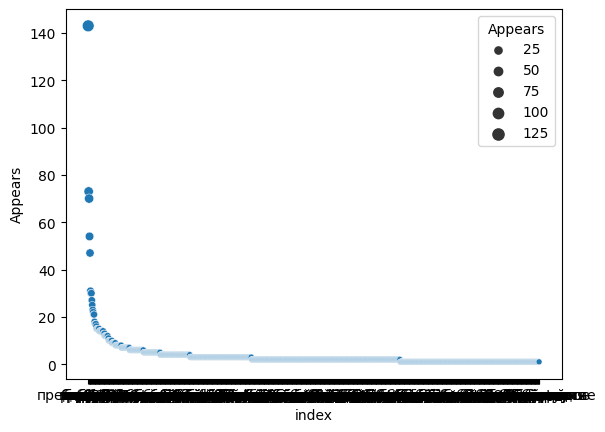

In [552]:
import seaborn as sns

plot = sns.scatterplot(data=article_analysis[1:1000], x="index", y="Appears", size="Appears")

# Pretrained модели gensim

In [603]:
import gensim.downloader

ruscorpora = gensim.downloader.load("word2vec-ruscorpora-300")

In [619]:
ruscorpora.most_similar("say", topn=4)

KeyError: "Key 'say' not present in vocabulary"